# Term Project
Team: Analytics<br>
Members: Kesav Adithya Venkidusamy <br>
Course: DSC630 - Predictive Analytics<br>
Instructor: Fadi Alsaleem <br>
Assignment: Week 4

## Income Prediction

<b>Idea</b>: Income prediction is important for a variety of areas in the private and nonprofit sectors. One critical area this affects is marketing, where income segmentation of the population is an extremely important tool. Businesses may make different variations of their items designated for certain subgroups of the population, and these subgroups often include the income of individuals. Income prediction also helps to identify those individuals who are of a lower income that may need the most assistance, who some nonprofits strive to identify and assist. The ability to predict the income of individuals from this information has far-reaching impacts for every industry.

<b>Dataset</b>
This data was extracted from the 1994 Census bureau database by Ronny Kohavi and Barry Becker (Data Mining and Visualization, Silicon Graphics). A set of clean records was extracted using the following conditions: ((AAGE>16) && (AGI>100) && (AFNLWGT>1) && (HRSWK>0))
https://www.census.gov/en.html

<b>Abstract</b>: Predict whether income exceeds $50K/year based on census data

#### Features and Target present in the dataset

1. Age - The age of an individual, this ranges from 17 to 90.

2. Workclass - The class of work to which an individual belongs.

3. Fnlwgt - The weight assigned to the combination of features (an estimate of how many people belong to this set of combination)

4. Education - Highest level of education

5. Education_num - Number of years for which education was taken

6. Marital_Status - Represents the category assigned on the basis of marriage status of a person

7. Occupation - Profession of a person

8. Relationship - Relation of the person in his family

9. Race - Origin background of a person

10. Sex - Gender of a person

11. Capital_gain - Capital gained by a person

12. Capital_loss - Loss of capital for a person

13. Hours_per_week - Number of hours for which an individual works per week

14. Native_Country - Country to which a person belongs

Target:

Income — The target variable, which predicts if the income is higher or lower than 50K$.

### Data Exploration

##### Importing libraries for data processing

In [1]:
## Importing all the libraries required for this project
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
pd.options.display.max_columns = None
import seaborn as sns

##### Source Data Analysis

In [2]:
## Reading input data and create dataframe
income_raw_df = pd.read_csv('dataset/Census_Income.csv')

In [3]:
## Showing few records from the dataframe using head command
income_raw_df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [4]:
## showing the shape of the dataframe
income_raw_df.shape

(48842, 15)

In [5]:
## Describe the numerical columns present in the dataframe
income_raw_df.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


##### Observation

- The age column has a range of 17 to 90.

- The fnlwgt column has a minimum value of 12285 and maximum value of 1484705

- The education number has a range of 1 to 16

- The capital gain starts from 0 and ends at 99999

- The capital loss starts at 0 and ends at 4356

- Hours per week range between 1–99.

- There are outliers expected in Capital gain column as the values till 75% are 0. Same is the case with capital loss as well.

- The fnlwgt column also has a huge difference between 75% values and the max value. There is a chance of getting outliers here.


In [6]:
## Analyzing the target variable
income_raw_df['income'].value_counts()

<=50K    37155
>50K     11687
Name: income, dtype: int64

#### Observation

The income column is our target variable with 2 values — ‘<=50K’ and ‘>50K’. The count of these values is 37155 and 11687 respectively, suggesting that people with income higher than 50K are significantly less, and our data set is imbalanced considering the target variable.

In [7]:
## Showing the info of the dataframe
income_raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [8]:
## Null values are represented as "?" in the dataset
## Replacing "?" with null values
income_null_df = income_raw_df.replace('?',np.nan)

In [9]:
## Displaying few values from the dataframe
income_null_df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,NaN,103497,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,<=50K


In [10]:
## Printing list of null values present in each column
income_null_df.isnull().sum()

age                   0
workclass          2799
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2809
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      857
income                0
dtype: int64

In [15]:
## Analyzing extra null values present in occupation
## Occupation is null but workclass is not null
income_null_df[income_null_df.workclass.notnull() & income_null_df.occupation.isnull()]

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
8785,17,Never-worked,131593,11th,7,Never-married,NaN,Own-child,Black,Female,0,0,20,United-States,<=50K
11607,20,Never-worked,273905,HS-grad,9,Married-spouse-absent,NaN,Other-relative,White,Male,0,0,35,United-States,<=50K
13898,18,Never-worked,162908,11th,7,Never-married,NaN,Own-child,White,Male,0,0,35,United-States,<=50K
21642,18,Never-worked,206359,10th,6,Never-married,NaN,Own-child,White,Male,0,0,40,United-States,<=50K
27126,23,Never-worked,188535,7th-8th,4,Divorced,NaN,Not-in-family,White,Male,0,0,35,United-States,<=50K
31053,17,Never-worked,237272,10th,6,Never-married,NaN,Own-child,White,Male,0,0,30,United-States,<=50K
36618,18,Never-worked,157131,11th,7,Never-married,NaN,Own-child,White,Female,0,0,10,United-States,<=50K
39513,20,Never-worked,462294,Some-college,10,Never-married,NaN,Own-child,Black,Male,0,0,40,United-States,<=50K
48585,30,Never-worked,176673,HS-grad,9,Married-civ-spouse,NaN,Wife,Black,Female,0,0,40,United-States,<=50K
48595,18,Never-worked,153663,Some-college,10,Never-married,NaN,Own-child,White,Male,0,0,4,United-States,<=50K


In [11]:
## Filtering the null values from the dataframe
income_df = income_null_df.dropna()
income_df.isnull().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

In [12]:
## Calculating the count of records after removing null values
income_df.count()

age                45222
workclass          45222
fnlwgt             45222
education          45222
educational-num    45222
marital-status     45222
occupation         45222
relationship       45222
race               45222
gender             45222
capital-gain       45222
capital-loss       45222
hours-per-week     45222
native-country     45222
income             45222
dtype: int64

In [20]:
## Converting the target column value to 0 and 1 for <=50K and >50K respectively
income_tgt_df = income_df.copy(deep=True)
income_tgt_df['income'] = np.where(income_tgt_df['income'] == '<=50K', 0, 1)
income_tgt_df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,0
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,0
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,1
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,1
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,0


In [21]:
##Calculating the total count for income
income_df['income'].value_counts()

<=50K    34014
>50K     11208
Name: income, dtype: int64

In [58]:
##Calculating the total count for income
income_tgt_df['income'].value_counts()

0    34014
1    11208
Name: income, dtype: int64

### Visualizations

#### Numerical Data Exploration

##### Histogram

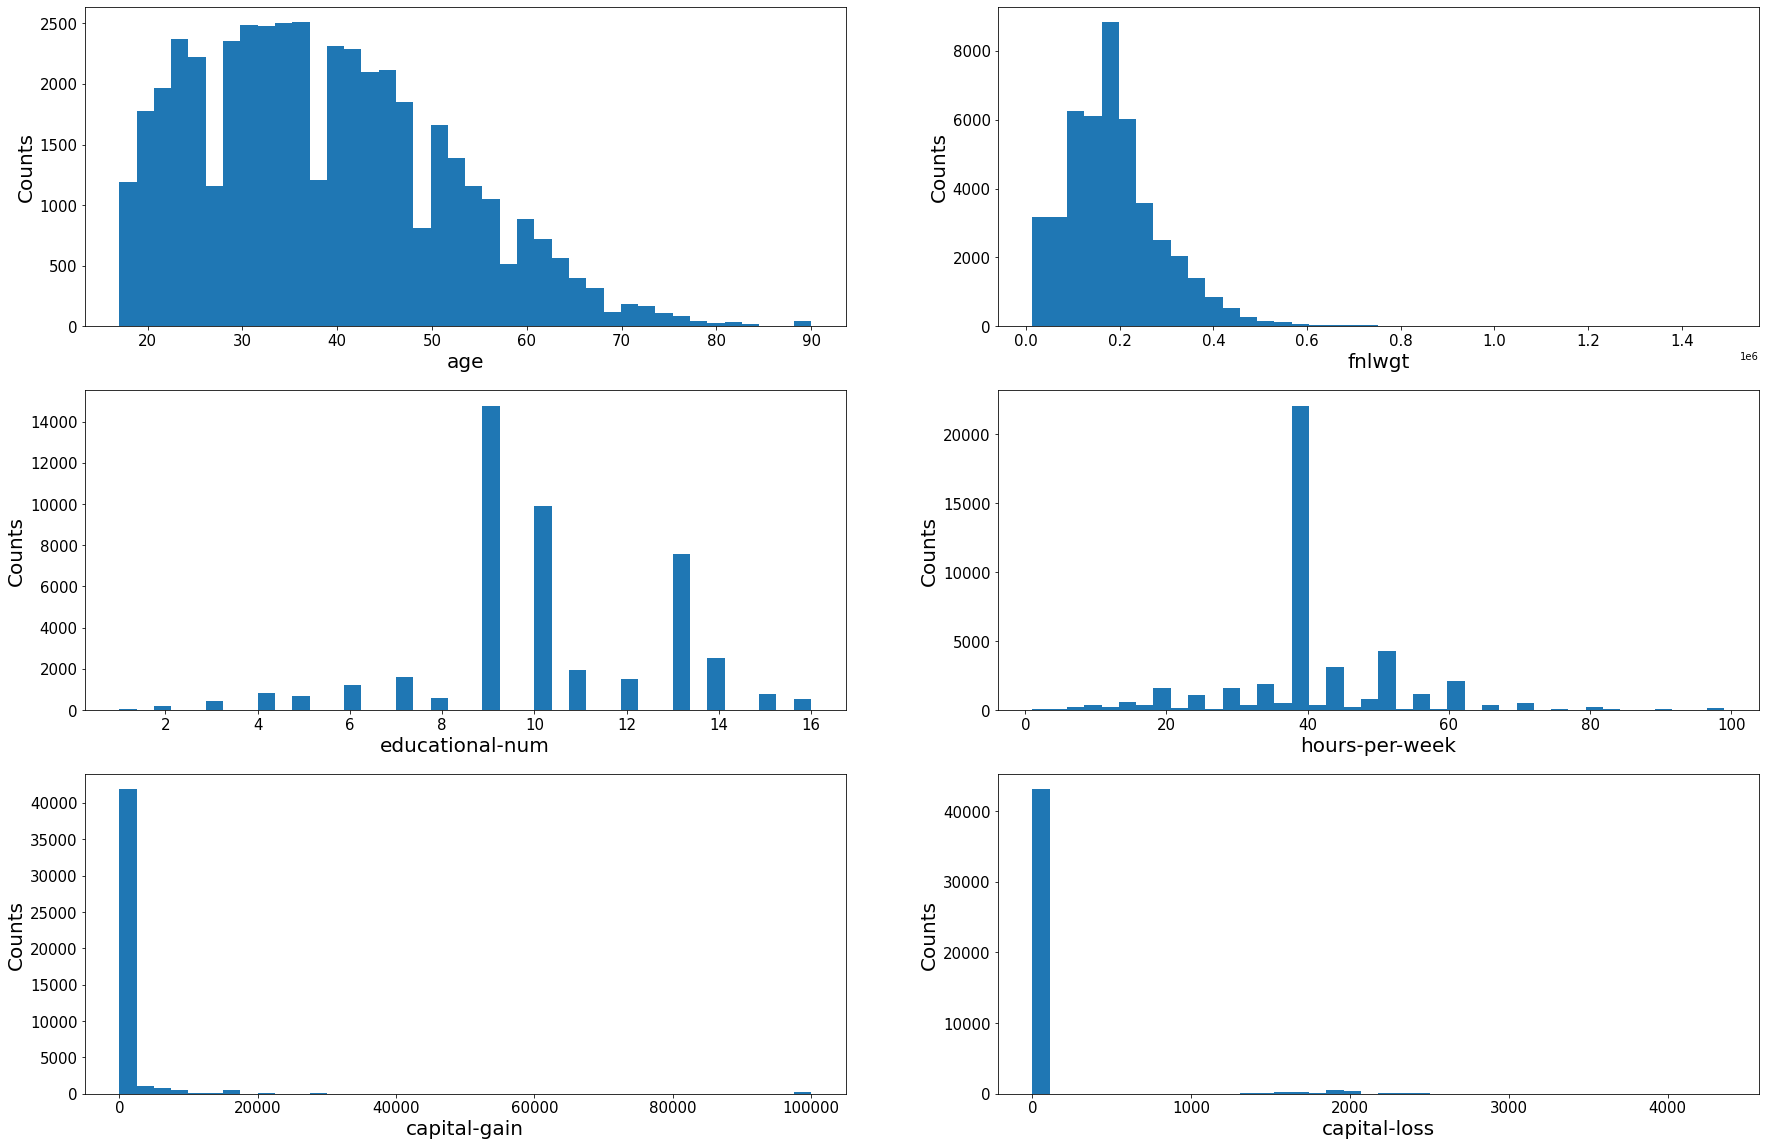

In [13]:
## Make some histograms of your data
## Specify the features of interest
features = ['age', 'fnlwgt', 'educational-num', 'hours-per-week', 'capital-gain','capital-loss']
xaxes = features
yaxes = ['Counts', 'Counts', 'Counts', 'Counts', 'Counts', 'Counts']
# set up the figure size
plt.rcParams['figure.figsize'] = (30, 20)
# make subplots
fig, axes = plt.subplots(nrows = 3, ncols = 2)
# draw histograms
axes = axes.ravel()
for idx, ax in enumerate(axes):
    ax.hist(income_df[features[idx]].dropna(), bins=40)
    ax.set_xlabel(xaxes[idx], fontsize=20)
    ax.set_ylabel(yaxes[idx], fontsize=20)
    ax.tick_params(axis='both', labelsize=15)
plt.show()

#### Observation:

1. <b>Age</b>: From the histogram, we observe that age feature is rightly skewed, with majority of the ages falling in the 20–50. The count keeps on decreasing as the age increases. There is no null values present in this column
2. <b>fntwgt</b>:The fntwgt feature is also rightly skewed with majority of data lies between 100k and 200k. The count decrease as the value increases.
3. <b>education_num</b>: The histogram for education number feature shows the type as multimode distribution. The frequency of education numberis high at 9 and least at 2.
4. <b>hours-per-week</b>: The hours per week column has values scattered over a range of 1–99. The column does not have any missing values. Majority of the values have data near 40 hours and hence a high peak can be observed for the same.
5. <b>capital-gain and capital-loss</b>: Capital_gain and Capital-loss columns are numeric columns, with majority of the values set as 0. The distribution plot for Capital_gain and Capital_loss columns are highly right skewed.


##### Heat Map

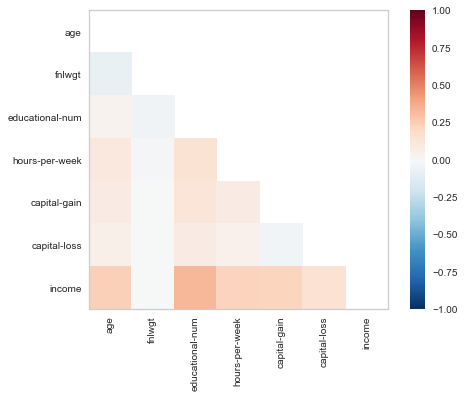

In [22]:
#create a heat map of the Pearson correlation coefficients of the numerical features
#set up the figure size
%matplotlib inline
plt.rcParams['figure.figsize'] = (15, 7)

heat_map_features = ['age', 'fnlwgt', 'educational-num', 'hours-per-week', 'capital-gain','capital-loss','income']

# import the package for visulization of the correlation
from yellowbrick.features import Rank2D

# extract the numpy arrays from the data frame
X = income_tgt_df[heat_map_features].values

# instantiate the visualizer 
heat_map = Rank2D(features=heat_map_features, algorithm='pearson')
heat_map.fit_transform(X) #fit and tranform the data for the heat map
plt.show() 

##### Bar Graph

In [23]:
# features = ['workclass','marital-status','occupation','native-country']
# fig = plt.figure()

# for i, col in enumerate(features):
#     fig.add_subplot(2,2, i + 1)
#     title = col.upper()
#     ax = income_df[col].value_counts().plot(kind='bar', figsize=(30, 20), fontsize=18)
#     ax.set_title(title, fontsize = 25)
#     ax.set_ylabel('Counts', fontsize = 18)
#     ax.set_xlabel(col, fontsize = 18)

# fig.tight_layout()

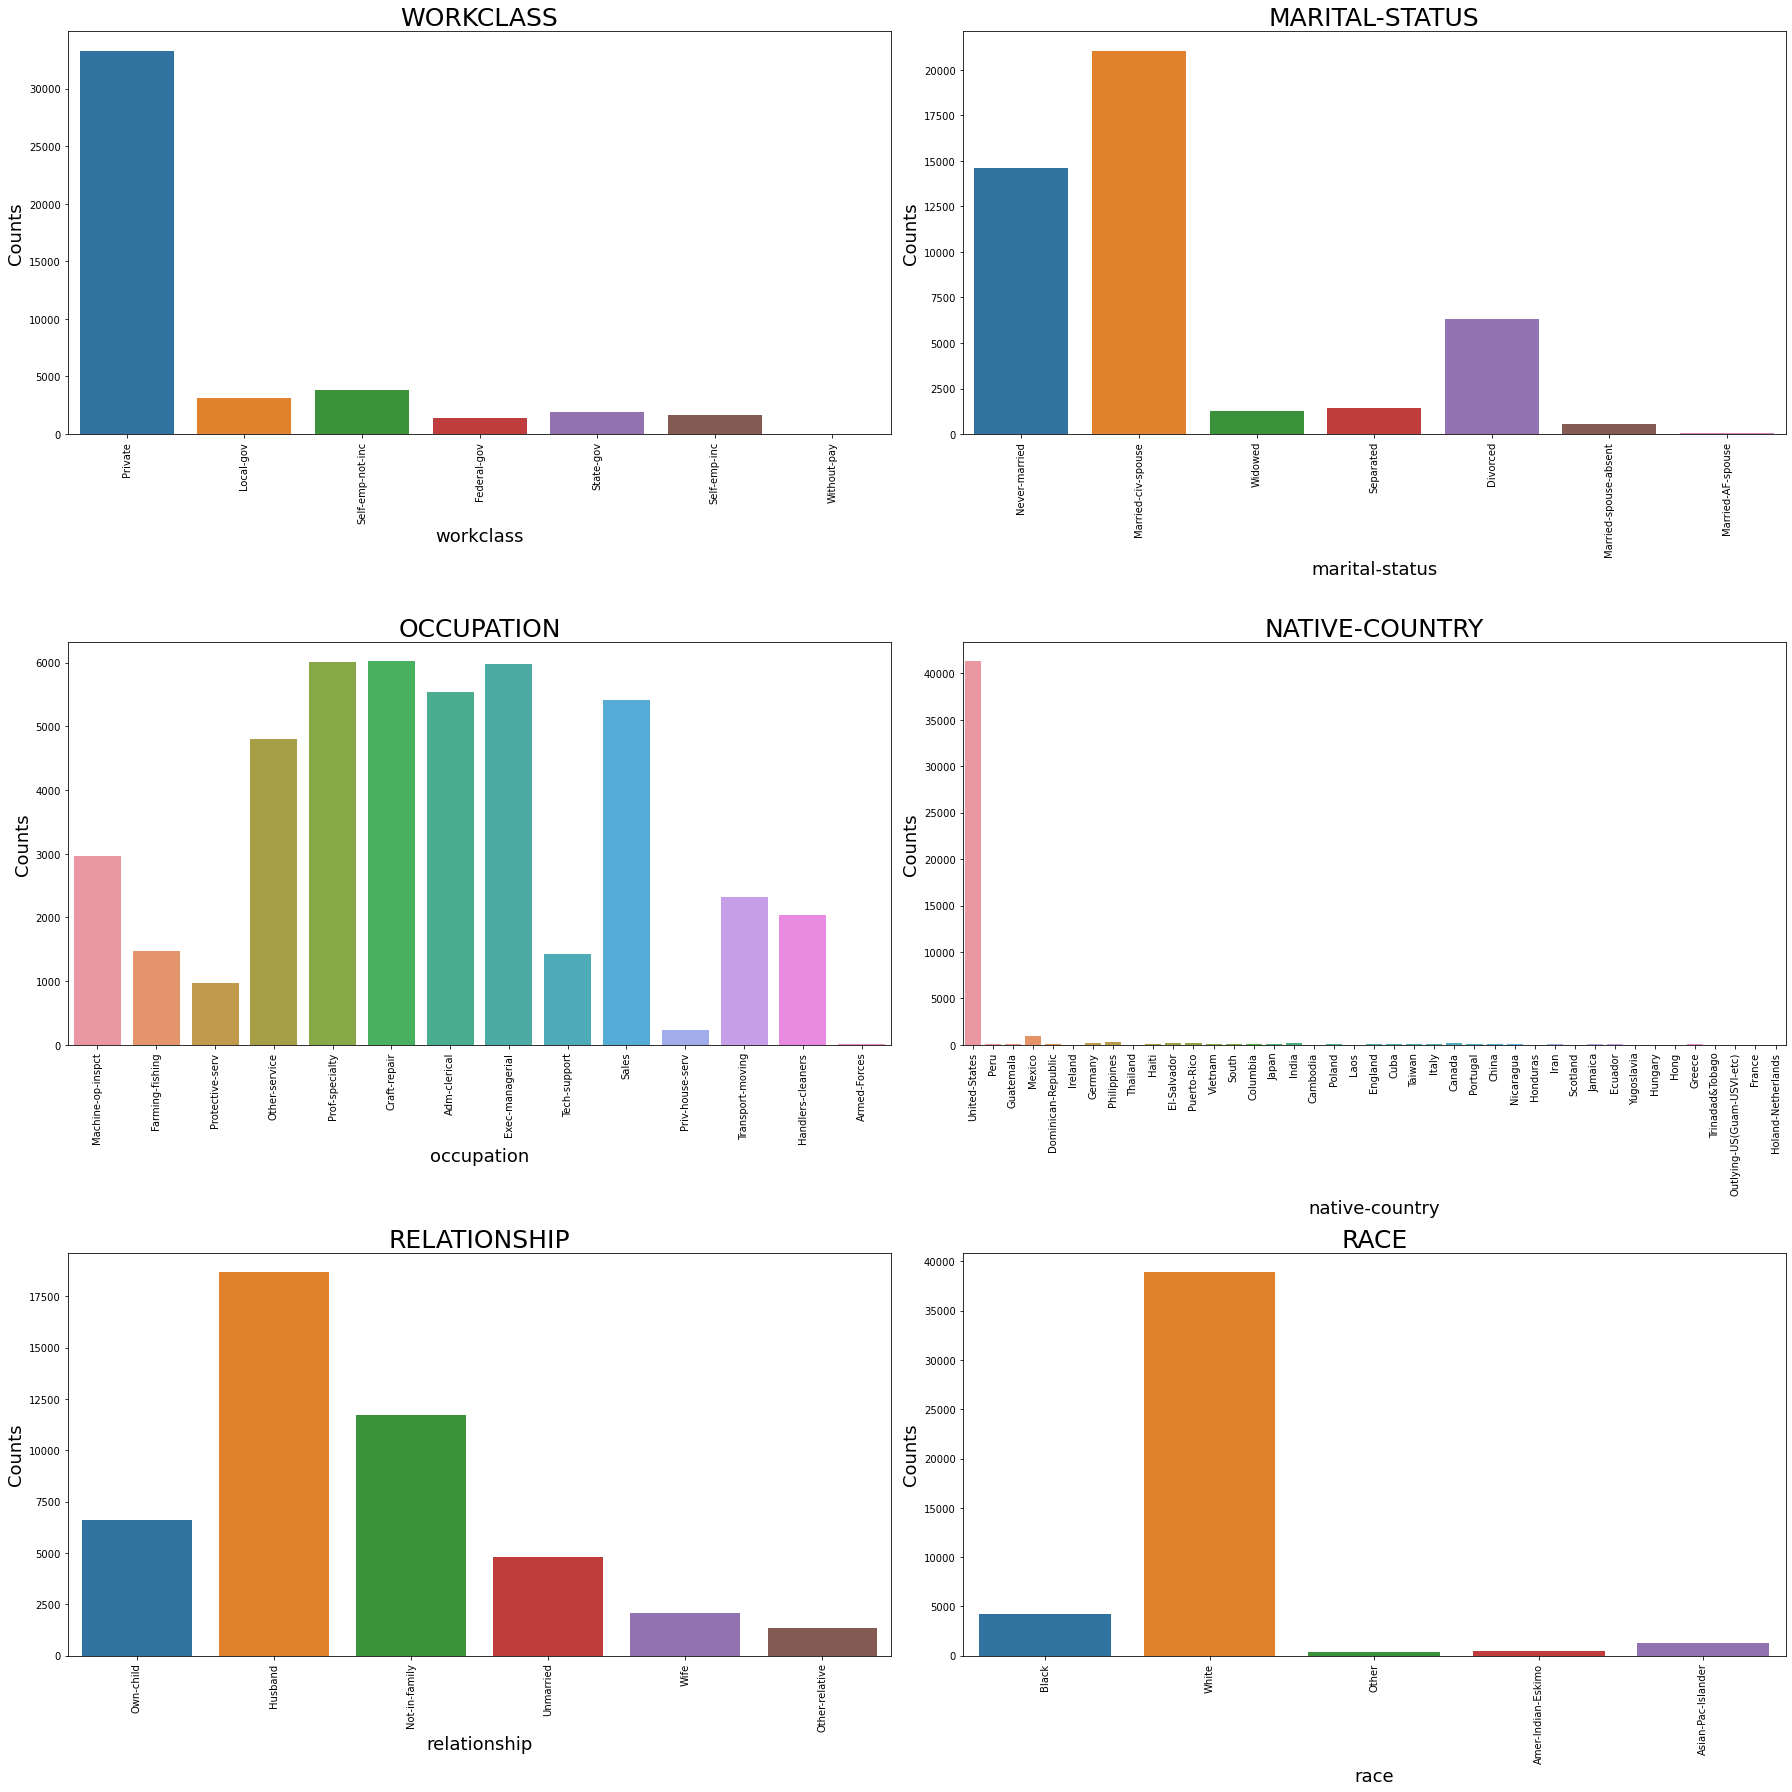

In [14]:
features = ['workclass','marital-status','occupation','native-country','relationship','race']
fig = plt.figure()

for i, col in enumerate(features):
    fig.add_subplot(3,2, i + 1)
    fig.set_figheight(25)
    fig.set_figwidth(25)
    title = col.upper()
    p = sns.countplot(income_df[col])
    p.set_title(title, fontsize = 25)
    p.set_ylabel('Counts', fontsize = 18)
    p.set_xlabel(col, fontsize = 18)
    plot = plt.xticks(rotation = 90)
fig.tight_layout()

#### Observation:

1. <b>workclass</b>: There are 7 unique values present for this feature. We had around 2799 null values present in this column which contributes only 5% of total records. So, all these null values are removed from the dataset. Based on the result, these null values might be replaced with mode. Majority of the people belong to ‘Private’ sector workclass. The values where ‘Workclass’ is missing, also has ‘Occupation’ missing!
2. <b>marital-status</b>: The ‘Marital_Status’ column has 7 different categories available, and has no missing values. Majority of the people have ‘Marital_Status’ as ‘Married-civ-spouse’, and least have ‘Married-AF-spouse’. Count of ‘Never-married’ is also quite high
3. <b>occupation</b>: The occupation column contains 14 different categories, and have missing values (which we have already observed, and combined with ‘Workclass’ column).
4. <b>native-country</b>: The Native_country column contains the highest count set to ‘United-States’, and rest of the rows contain quite few numbers. We also have 857 missing values in this column, which are removed from the datasets.
5. <b>relationship</b>: The relationship column contains 6 different types of values, with highest number set for ‘Husband’ and lowest for ‘Other-relative’. The column does not have any missing value.
6. <b>race</b>: The Race column has 5 different categories, and no missing data. Highest number of people have race as ‘White’ (significantly high numbers).

##### Stacked Bar

<Figure size 2160x2160 with 0 Axes>

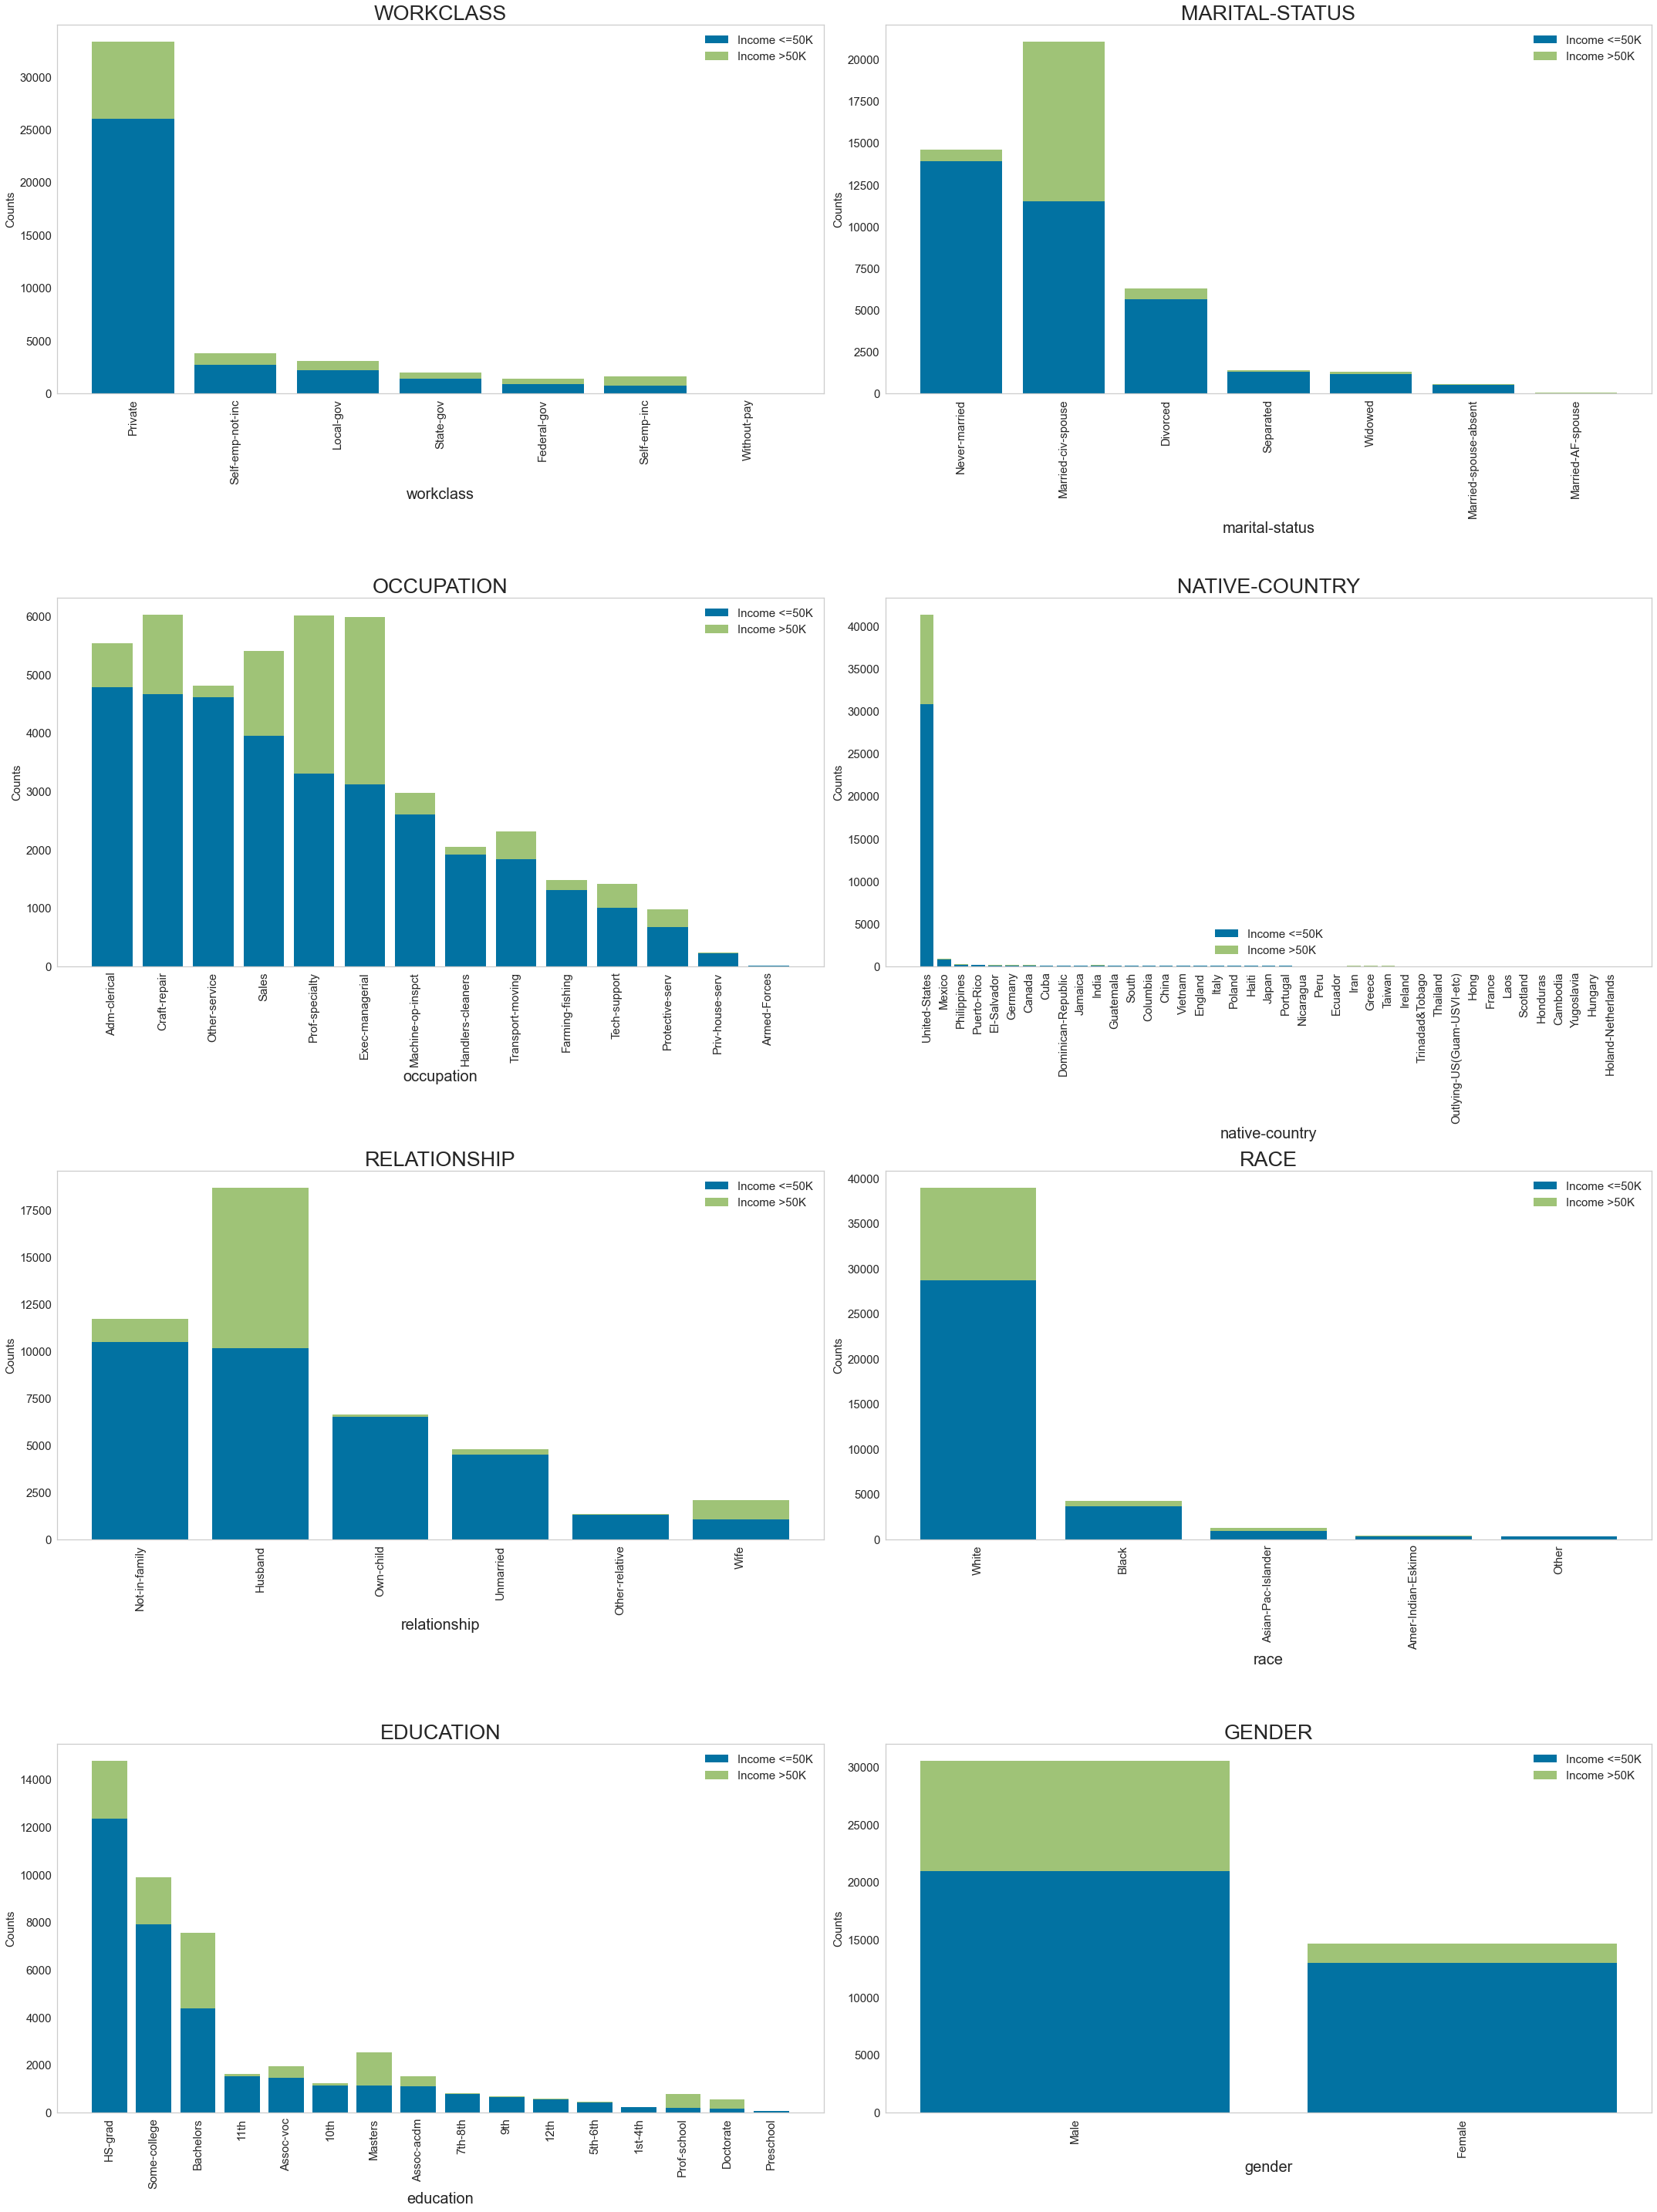

In [57]:
# make the data read to feed into the visualizer
cat_features = ['workclass','marital-status','occupation','native-country','relationship','race', 'education','gender']
fig = plt.figure()

plt.rcParams['figure.figsize'] = (30, 40)

# make subplots
fig, axes = plt.subplots(nrows = 4, ncols = 2)
colindex = 0

for idx, ax in enumerate(axes):
    
    for j in range(2):
        
        
        col = cat_features[colindex]
        coltitle = col.upper()
        
        income_less_50 = income_tgt_df[income_tgt_df['income']==0][col].value_counts()
        income_grt_50 = income_tgt_df[income_tgt_df['income']==1][col].value_counts()
        income_grt_50 = income_grt_50.reindex(index = income_less_50.index)
        
        axes[idx,j].grid(False)
        p1 = axes[idx,j].bar(income_less_50.index, income_less_50.values)
        p2 = axes[idx,j].bar(income_grt_50.index, income_grt_50.values, bottom=income_less_50.values)
        
        axes[idx,j].set_title(coltitle, fontsize=27)
        axes[idx,j].set_xlabel(col, fontsize=20)
        axes[idx,j].set_ylabel('Counts', fontsize=15)
        axes[idx,j].tick_params(axis='both', labelsize=15)
        axes[idx,j].tick_params(axis='x', labelrotation=90)
        axes[idx,j].legend((p1[0],p2[0]),('Income <=50K', 'Income >50K'), fontsize=15)
        colindex += 1
fig.tight_layout()

#### Observation:

1. <b>workclass</b>: Majority of the people belong to ‘Private’ sector workclass. Among Privte class most of the people belong to <=50K incme group. Most of the people belong to <=50K compared to >50K for all other income group as well.
2. <b>marital-status</b>: The ‘Marital_Status’ column has 7 different categories available, and has no missing values. Majority of the people have ‘Marital_Status’ as ‘Married-civ-spouse’, and least have ‘Married-AF-spouse’. Count of ‘Never-married’ is also quite high. The data is almost equally split between the income group for "Married-civ-spouse' 
3. <b>occupation</b>: The occupation column contains 14 different categories, and have missing values (which we have already observed, and combined with ‘Workclass’ column). Except few values where the data is equally split between the income class, all other group have higher count for <=50K income.
4. <b>native-country</b>: The Native_country column contains the highest count set to ‘United-States’, and rest of the rows contain quite few numbers. We also have 857 missing values in this column, which are removed from the datasets. The count is higher for <=50K income group compared to other for US.
5. <b>relationship</b>: The relationship column contains 6 different types of values, with highest number set for ‘Husband’ and lowest for ‘Other-relative’. The column does not have any missing value. If the relationship in family is either ‘Husband/Wife’, the chances of earning more than 50K is high.
6. <b>race</b>: The Race column has 5 different categories, and no missing data. Highest number of people have race as ‘White’ (significantly high numbers). A person has high chance of earning >50K in case his/her race is ‘White’/’Asian-pac-islander’.
7. <b>education</b>: People with education level as ‘Masters/Doctorate/Prof-school’ have higher ratios of >50K earning, than <=50K. Bachelors degree also has around 10:7 ratio of <=50K : >50K.
8. <b>gender</b>: Males have a higher chance of earning more than 50K, than females.